In [1]:
import numpy as np
import scipy as sp
import scipy.stats as stats
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

<h2>Критерий Шапиро-Уилка</h2>
Используется для проверки гипотезы H0: "случайная величина X распределена нормально". <br><br>
Создадим 2 выборки

In [5]:
norm1 = sp.random.normal(1000, 100, size=1000).astype(int) # нормально распределенная выборка
exp1 = sp.random.exponential(1000,size=1000).astype(int) # экспоненциально распределенная выборка

<AxesSubplot:ylabel='Count'>

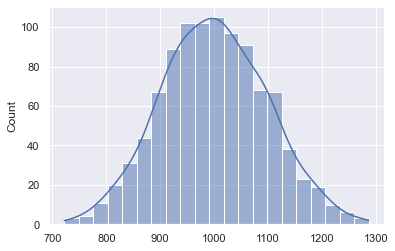

In [6]:
sns.histplot(norm1, kde=True)

<AxesSubplot:ylabel='Count'>

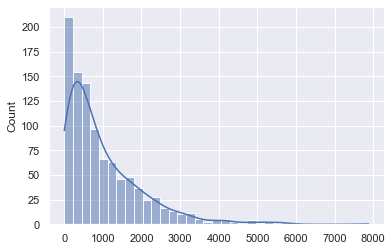

In [7]:
sns.histplot(exp1, kde=True)

Для проверки данного критерия будем использовать модуль stats библиотеки scipy

In [8]:
print(stats.shapiro(norm1))
print(stats.shapiro(exp1))
alpha = 0.05

ShapiroResult(statistic=0.9985741376876831, pvalue=0.6036959290504456)
ShapiroResult(statistic=0.816506028175354, pvalue=2.919520658650002e-32)


Здесь нас интересует параметр pvalue. Определяем, является ли выборка нормально распределенной следующим образом:

In [9]:
alpha = 0.05 # уровень значимости
s1, p1 = stats.shapiro(norm1)
if p1 > alpha:
    print('Выборка norm1 выглядит нормально распределенной (не отвергаем H0)')
else:
    print('Выборка norm1 не выглядит нормально распределенной (отвергаем H0)')

Выборка norm1 выглядит нормально распределенной (не отвергаем H0)


In [10]:
s2, p2 = stats.shapiro(exp1)
if p2 > alpha:
    print('Выборка exp1 выглядит нормально распределенной (не отвергаем H0)')
else:
    print('Выборка exp1 не выглядит нормально распределенной (отвергаем H0)')

Выборка exp1 не выглядит нормально распределенной (отвергаем H0)


<h2>Критерий Стьюдента</h2>
Используется для проверки гипотезы об однородности вида <b>смещение</b><br>
 H0: <span style="text-decoration:overline">m</span><sub>y</sub> 
 - 
 <span style="text-decoration:overline">m</span><sub>x</sub> = 0<br>
Для использования должны выполняться требования:
<ul>
    <li>Дисперсии выборок равны</li>
    <li>Выборки нормально распределены</li>
</ul>

In [11]:
x = sp.random.normal(size=100)
y = sp.random.normal(size=100)

N = len(np.concatenate([x,y]))

In [12]:
#Дисперсия объединенной выборки x+y
S_2 = 1/(N-2) * (np.sum((x-x.mean())**2) + np.sum((y-y.mean())**2))
S_2

0.8403007771599441

In [13]:
S = np.sqrt(S_2)
S

0.9166792116983695

In [18]:
#Статистика критерия Стьюдента
T = (y.mean() - x.mean()) / (S*np.sqrt(1/len(x)+1/len(y)))
T

0.054038419994847244

In [19]:
#p-value Критерия Стьюдента (для альтернативы H3: "Средние не равны")
if T<0:
    p = stats.t.cdf(T, N-2)
else:
    p = 1 - stats.t.cdf(T, N-2)
p*2

0.9569590387515556

In [20]:
stats.ttest_ind(y, x, equal_var=True)
alpha=0.05

Ttest_indResult(statistic=0.05403841999484725, pvalue=0.9569590387515556)

<h2>U-критерий Манна — Уитни</h2>
<h3>(Mann–Whitney U-test, MWW)</h3>
Используется для проверки гипотезы об однородности вида <b>смещение</b><br>
Используется для выборок <b>не имеющих нормальное распределение</b>

In [21]:
x = np.random.normal(1000, 100, 20).astype(int)

y = np.random.normal(1120, 120, 22).astype(int)
x,y

(array([ 975, 1135,  999, 1204, 1040, 1082,  821,  985,  976,  992,  960,
         952, 1076,  941,  957,  949, 1112, 1032,  928, 1063]),
 array([ 843, 1197, 1175,  985, 1066, 1160, 1061,  926, 1246, 1148, 1094,
        1159, 1028, 1232, 1217, 1020, 1007, 1119,  975, 1070, 1265, 1101]))

Будем использовать реализацию критерия в scipy

In [23]:
stats.mannwhitneyu(x, y, alternative='two-sided') #less, greater

MannwhitneyuResult(statistic=114.0, pvalue=0.00788020267704185)

Можно посчитать через нормальное распределение

In [26]:
n1 = len(x)
n2 = len(y)
N = n1 + n2

R = stats.rankdata(np.hstack([x, y]))
R1 = R[:n1]
R2 = R[n1:N]
R1, R2

(array([10.5, 32. , 16. , 38. , 21. , 27. ,  1. , 13.5, 12. , 15. ,  9. ,
         7. , 26. ,  5. ,  8. ,  6. , 30. , 20. ,  4. , 23. ]),
 array([ 2. , 37. , 36. , 13.5, 24. , 35. , 22. ,  3. , 41. , 33. , 28. ,
        34. , 19. , 40. , 39. , 18. , 17. , 31. , 10.5, 25. , 42. , 29. ]))

In [27]:
U1 = n1 * n2 + n1 * (n1 + 1) / 2 - R1.sum()
U2 = n1 * n2 + n2 * (n2 + 1) / 2 - R2.sum()
U1 + U2, n1 * n2

(440.0, 440)

In [28]:
#статистика критерия
U = min(U1, U2)
U1, U2, U

(326.0, 114.0, 114.0)

In [29]:
MU = n1 * n2 / 2
DU = n1 * n2 * (n1 + n2 + 1) / 12
std_U = (U - MU) / np.sqrt(DU)
std_U

-2.6695368626993674

In [30]:
#p-value критерия
stats.norm.cdf(std_U) * 2

0.007595593507035731

<h2>Критерий Фишера</h2>
Используется для проверки гипотезы об однородности вида <b>растяжение/сжатие</b><br>
H0: y.var/x.var=1<br>
Используется для выборок <b>имеющих нормальное распределение</b>

In [31]:
x = np.random.normal(0, 100, size=100)
y = np.random.normal(0, 100, size=100)

n=y.size
m=x.size

print(y.mean(), x.mean())
print(y.var(ddof=1), x.var(ddof=1))

3.3147521254712147 4.952356838912728
11142.01783449043 8424.801477585785


<h4>Для альтернативной гипотезы H3: "дисперсии не равны"</h4>

In [32]:
xvar = x.var(ddof=1)
yvar = y.var(ddof=1)
if yvar > xvar:
    #Статистика Критерия Фишера
    T = yvar / xvar
    #p-value Критерия Фишера
    p_value = 1 - stats.f.cdf(T, n - 1, m - 1)
else:
    T = xvar / yvar
    p_value = 1 - stats.f.cdf(T, m - 1, n - 1)
# двусторонний критерий, поэтому 2*p_value
T, 2*p_value

(1.3225258617824776, 0.16606444143315047)

#### Для альтернативной гипотезы H1: yvar/xvar<1

In [33]:
yvar = y.var(ddof=1)
xvar = x.var(ddof=1)

n = y.size
m = x.size
if yvar < xvar:
    #Статистика Критерия Фишера
    T = xvar / yvar
    #p-value Критерия Фишера
    p_value = 1 - stats.f.cdf(T, m - 1, n - 1)
    print(T, p_value)
else:
    print('Принимаем H0')

Принимаем H0


#### Для альтернативной гипотезы H2: yvar/xvar>1

In [34]:
yvar = y.var(ddof=1)
xvar = x.var(ddof=1)

n = y.size
m = x.size
if yvar > xvar:
    #Статистика Критерия Фишера
    T = yvar / xvar
    #p-value Критерия Фишера
    p_value = 1 - stats.f.cdf(T, n - 1, m - 1)
    print(T, p_value)
else:
    print('Принимаем H0')

1.3225258617824776 0.08303222071657523


<h2>Критерий Ансари-Бредли</h2>
Используется для проверки гипотезы об однородности вида <b>растяжение/сжатие</b><br>
Используется для выборок <b>не имеющих нормальное распределение</b>

In [35]:
x = np.random.exponential(size=100)
y = np.random.exponential(size=100)

In [36]:
#Статистика Критерия Ансари-Бредли
N = x.size + y.size
print(N)
A = 0
for r in stats.rankdata(np.hstack([x, y]))[:x.size]:
    A += (N + 1) / 2 - np.abs(r - (N + 1) / 2)
A

200


4852.0

In [37]:
if N%2==0:
    M = x.size * (N + 2) / 4
    D = x.size * y.size * (N + 2) * (N - 2) / (48 * (N - 1))
else:
    M = x.size * (N + 1)**2 / (4 * N)
    D = x.size * y.size * (N**2 + 3) * (N + 1) / (48 * N**2)

#Стандартизованная статистика
A_std = (A - M) / np.sqrt(D)
A_std

-0.9676182865752649

In [38]:
p_value = 2*(stats.norm.cdf(A_std if A_std<0 else -A_std))
p_value

0.33323504109662594

In [39]:
stats.ansari(x,y)

AnsariResult(statistic=4852.0, pvalue=0.33323504109662594)

### ОДН-1

In [40]:
centr = np.array([4297.3, 4244.3, 4386.3, 4085.4, 4321.5, 4290.5, 4771.7, 4809.9])
sib = np.array([4281.2, 4426.5, 4571.7, 4896.0, 4339.5, 4278.0])

In [41]:
stats.shapiro(centr), stats.shapiro(sib)

(ShapiroResult(statistic=0.8478221893310547, pvalue=0.0905432179570198),
 ShapiroResult(statistic=0.8362329006195068, pvalue=0.12128771096467972))

In [44]:
xvar = centr.var(ddof=1)
yvar = sib.var(ddof=1)
if yvar > xvar:
    #Статистика Критерия Фишера
    T = yvar / xvar
    #p-value Критерия Фишера
    p_value = 1 - stats.f.cdf(T, n - 1, m - 1)
else:
    T = xvar / yvar
    p_value = 1 - stats.f.cdf(T, m - 1, n - 1)
# двусторонний критерий, поэтому 2*p_value
T, 2*p_value

(1.1561539693379534, 0.47169557178527066)

In [47]:
x = centr
y = sib
N = len(np.concatenate([x,y]))
#Дисперсия объединенной выборки x+y
S_2 = 1/(N-2) * (np.sum((x-x.mean())**2) + np.sum((y-y.mean())**2))
S = np.sqrt(S_2)
#Статистика критерия Стьюдента
T = (y.mean() - x.mean()) / (S*np.sqrt(1/len(x)+1/len(y)))
T

0.48138457184648514

In [48]:
#p-value Критерия Стьюдента (для альтернативы H3: "Средние не равны")
if T<0:
    p = stats.t.cdf(T, N-2)
else:
    p = 1 - stats.t.cdf(T, N-2)
p*2

0.6389021669918256

In [49]:
y.mean(), x.mean()

(4465.483333333334, 4400.8625)

### ОДН-2

In [51]:
x1 = np.array([258, 588, 477, 577, 619, 614, 641, 543, 517, 593])
x2 = np.array([537, 398, 256, 440, 376, 524, 527, 589, 479])

Сначала проверяем выборки на нормальное распределение. Используем критерий Шапиро-Уилка

In [52]:
stats.shapiro(x1), stats.shapiro(x2)

(ShapiroResult(statistic=0.7683424949645996, pvalue=0.0059696887619793415),
 ShapiroResult(statistic=0.9406910538673401, pvalue=0.5891920328140259))

Видим, что для х1 pvalue < 0.05(уровень значимости) - следовательно мы отвергаем H0:'выборка имеет норм. распределение' <br>
Раз х1 не нормально распределена, то для сравнения средних значений будем применять критерий MWW

In [55]:
stats.mannwhitneyu(x1, x2, alternative='greater')

MannwhitneyuResult(statistic=70.0, pvalue=0.02272764742452923)

pvalue < 0.05 - отвергаем H0: "средние равны" в пользу альтернативы: x1.mean > x2.mean

### ОДН-3

In [56]:
a = np.array([2, 22, 35, 50, 55, 68, 179, 245])
b = np.array([4, 13, 24, 46, 59, 94, 156, 221, 265])

In [57]:
stats.shapiro(a), stats.shapiro(b)

(ShapiroResult(statistic=0.8199241757392883, pvalue=0.04657813534140587),
 ShapiroResult(statistic=0.8787530660629272, pvalue=0.1523428112268448))

In [58]:
stats.mannwhitneyu(a, b, alternative='two-sided')

MannwhitneyuResult(statistic=33.0, pvalue=0.8098941304284747)

pvalue>0.05 -> принимаем H0 - средние равны

### ОДН-4

In [61]:
A = np.array([1191, 1252, 1269, 1205, 1251, 1270, 1257, 1257, 1241, 1232, 1230])
B = np.array([1139, 1224, 1193, 1214, 1221, 1236, 1213, 1202, 1220, 1255, 1179, 1223, 1195, 1202])
stats.shapiro(A), stats.shapiro(B)

(ShapiroResult(statistic=0.9068009257316589, pvalue=0.2234085202217102),
 ShapiroResult(statistic=0.9330739974975586, pvalue=0.33678585290908813))

распределения нормальные. Следовательно проверяем равенство дисперсий с помощью критерия Фишера (для того чтобы убедиться, что можем применить Критерий Стьюдента)

In [64]:
xvar = A.var(ddof=1)
yvar = B.var(ddof=1)

n = B.size
m = A.size

if yvar > xvar:
    #Статистика Критерия Фишера
    T = yvar / xvar
    #p-value Критерия Фишера
    p_value = 1 - stats.f.cdf(T, n - 1, m - 1)
else:
    T = xvar / yvar
    p_value = 1 - stats.f.cdf(T, m - 1, n - 1)
# двусторонний критерий, поэтому 2*p_value
T, 2*p_value

(1.2002138062223897, 0.7851393868793979)

In [65]:
stats.ttest_ind(A, B, equal_var=True)

Ttest_indResult(statistic=3.086787200656427, pvalue=0.005208022762074316)

p_value<0.05 -> отвергаем H0 в пользу альтернативы a.mean!=b.mean

### ОДН-5

In [67]:
A = np.array([7.6, 7.8, 8.3, 8.5, 8.8, 9.4, 9.7, 10.3, 12.2])
B = np.array([6.3, 6.8, 1.2, 7.3, 7.5, 7.9, 8, 8.1, 8.2, 8.7, 9, 9.5])

In [68]:
stats.shapiro(A), stats.shapiro(B)

(ShapiroResult(statistic=0.914492666721344, pvalue=0.34859731793403625),
 ShapiroResult(statistic=0.7352441549301147, pvalue=0.001882384531199932))

In [69]:
stats.mannwhitneyu(A, B, alternative='greater')

MannwhitneyuResult(statistic=85.0, pvalue=0.015096828092808498)

p_value < 0.05 -> отвергаем H0 в пользу альтернативы A.mean > B.mean

### ОДН-6

In [76]:
x = np.array([94.70, 94.92, 94.94, 94.94, 94.92, 95.06, 95.01, 95.06, 95.10, 94.97]) # прибор А
y = np.array([94.56, 95.02, 95.14, 94.66, 95.01, 95.15, 95.05, 95.05, 94.94, 94.86, 94.85, 95.16]) # прибор B

m = x.size
n = y.size

xvar = x.var(ddof=1)
yvar = y.var(ddof=1)

In [78]:
# нам необходимо убедиться, что xvar<yvar -> выбираем альтернативную гипотезу H2: yvar/xvar>1
if yvar > xvar:
    #Статистика Критерия Фишера
    T = yvar / xvar
    #p-value Критерия Фишера
    p_value = 1 - stats.f.cdf(T, n - 1, m - 1)
    print(T, p_value)
else:
    print('Принимаем H0')

2.8976673379363818 0.06056789742116042


In [ ]:
p_value > 0.05 -> принимаем Н0

### ОДН-7 

In [80]:
x = np.array([21742, 22786, 23900, 23176, 22700, 22494, 23668, 23136, 22997, 23636])
y = np.array([21769, 24147, 22092, 24482, 23981, 23217, 22201, 23133, 23269, 23399, 22859])
n = y.size
m = x.size
stats.shapiro(x), stats.shapiro(y)

(ShapiroResult(statistic=0.9590200185775757, pvalue=0.7746431827545166),
 ShapiroResult(statistic=0.9581634402275085, pvalue=0.7485851049423218))

In [81]:
xvar = x.var(ddof=1)
yvar = y.var(ddof=1)
if yvar > xvar:
    #Статистика Критерия Фишера
    T = yvar / xvar
    #p-value Критерия Фишера
    p_value = 1 - stats.f.cdf(T, n - 1, m - 1)
else:
    T = xvar / yvar
    p_value = 1 - stats.f.cdf(T, m - 1, n - 1)
# двусторонний критерий, поэтому 2*p_value
T, 2*p_value

(1.8470819964986498, 0.36988994590060287)

In [82]:
stats.ttest_ind(x, y, equal_var=True)

Ttest_indResult(statistic=-0.34925688132293214, pvalue=0.730737437025595)

p_value > 0.05 -> принимаем Н0 (средние равны)

### ОДН-8 

In [84]:
x = np.array([164.7, 165.01, 165.09, 164.77, 165, 165.1, 165.03, 165.03, 164.96, 164.91, 164.9, 165.11, 165.06, 164.81, 164.96, 165.03])
y = np.array([160.41, 161.23, 160.94, 161.13, 161.2, 161.35, 161.12, 161.02, 161.2, 161.53, 160.8, 161.22, 160.96, 161.02, 160.55, 160.78])
n = y.size
m = x.size
xvar = x.var(ddof=1)
yvar = y.var(ddof=1)

In [85]:
if yvar > xvar:
    #Статистика Критерия Фишера
    T = yvar / xvar
    #p-value Критерия Фишера
    p_value = 1 - stats.f.cdf(T, n - 1, m - 1)
    print(T, p_value)
else:
    print('Принимаем H0')

5.688673600227717 0.0008595806123053995


p_value < 0.05 -> Отвергаем H0 в пользу альтернативы -> шары Х более сбалансированные

### ОДН-9

In [86]:
x = np.array([6178, 6600, 6694, 6646, 6547, 6809, 6596, 6740, 6769, 6598])
y = np.array([5903, 6559, 6648, 6426, 6456, 6353, 6603, 6385, 6616, 6518, 6171, 6612])
stats.shapiro(x), stats.shapiro(y)

(ShapiroResult(statistic=0.8196130990982056, pvalue=0.025070497766137123),
 ShapiroResult(statistic=0.8476085662841797, pvalue=0.0343039371073246))

In [87]:
stats.mannwhitneyu(x, y, alternative='two-sided')

MannwhitneyuResult(statistic=92.0, pvalue=0.03779708390871803)

p_value < 0.05 -> Отвергаем H0 в пользу альтернативы (средние не равны)